# Model Development

### Linear Regression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
lm = LinearRegression()

In [3]:
df = pd.read_csv("usedcars.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
X = df[['highway-mpg']]
Y = df['price']

In [5]:
lm.fit(X, Y)

LinearRegression()

In [6]:
Yhat = lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
lm.intercept_

np.float64(38423.305858157386)

In [8]:
lm.coef_

array([-821.73337832])

In [9]:
lm1 = LinearRegression()

In [10]:
X = df[['engine-size']]
Y = df['price']

In [11]:
lm.fit(X, Y)

LinearRegression()

In [12]:
Yhat = lm.predict(X)

In [13]:
lm.intercept_

np.float64(-7963.338906281042)

In [14]:
lm.coef_

array([166.86001569])

In [15]:
Price=-7963.34 + 166.86*df['engine-size']
Price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

In [16]:
type(Price)

pandas.core.series.Series

In [17]:
lm.score(X, Y)

0.7609686443622008

### Multiple Linear Regression

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
lm.intercept_

np.float64(-15806.624626329223)

In [21]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [22]:
lm.score(Z, df['price'])

0.8093562806577457

In [23]:
lm2 = LinearRegression()

In [24]:
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [25]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [26]:
# import the visualization package: seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

(0.0, 48167.73151533994)

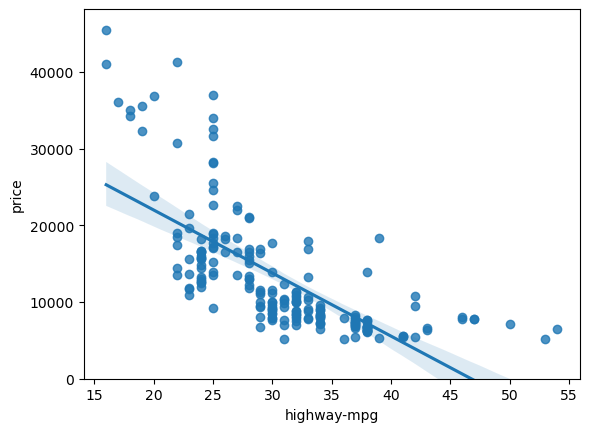

In [28]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

negative relationship as milage increases price decreases

(0.0, 47414.1)

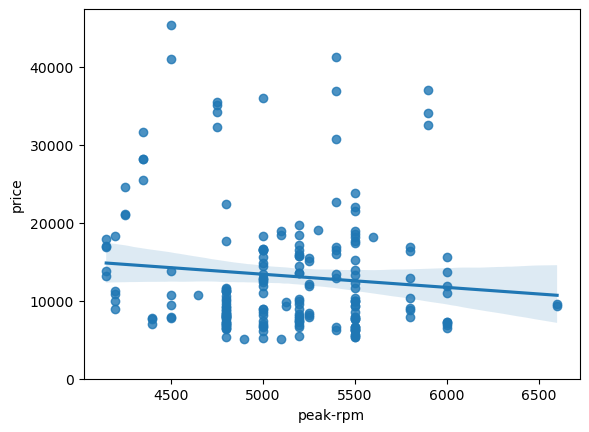

In [29]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

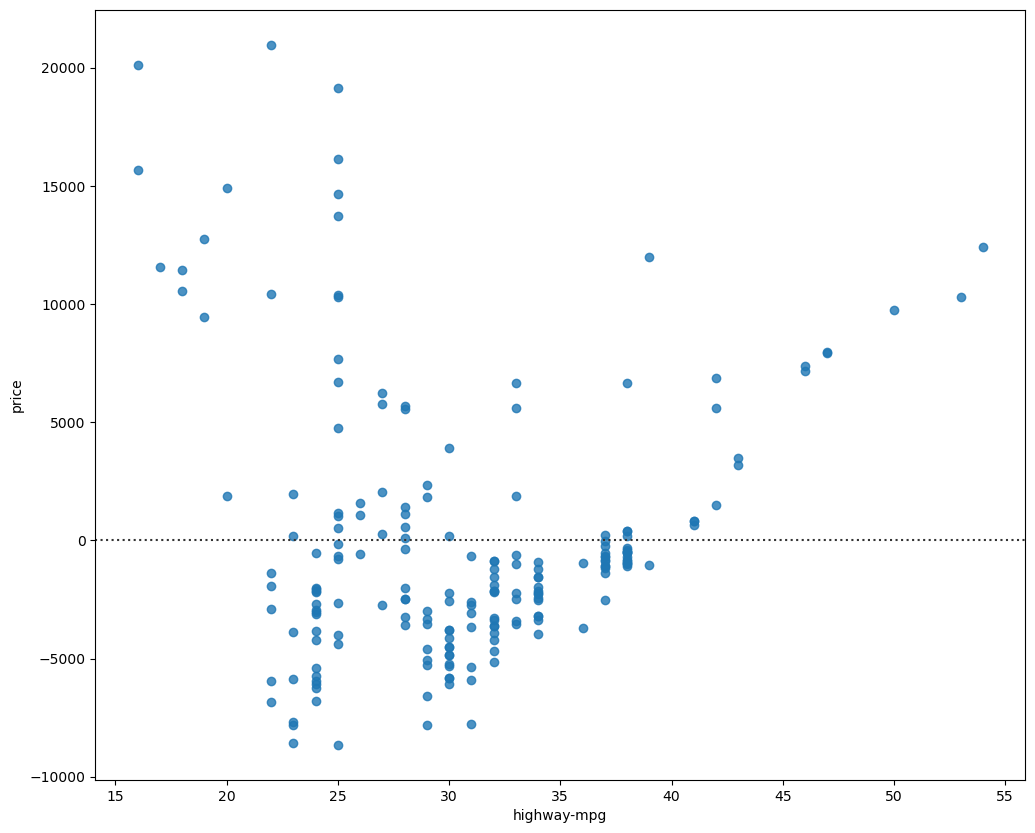

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [31]:
Y_hat = lm.predict(Z)

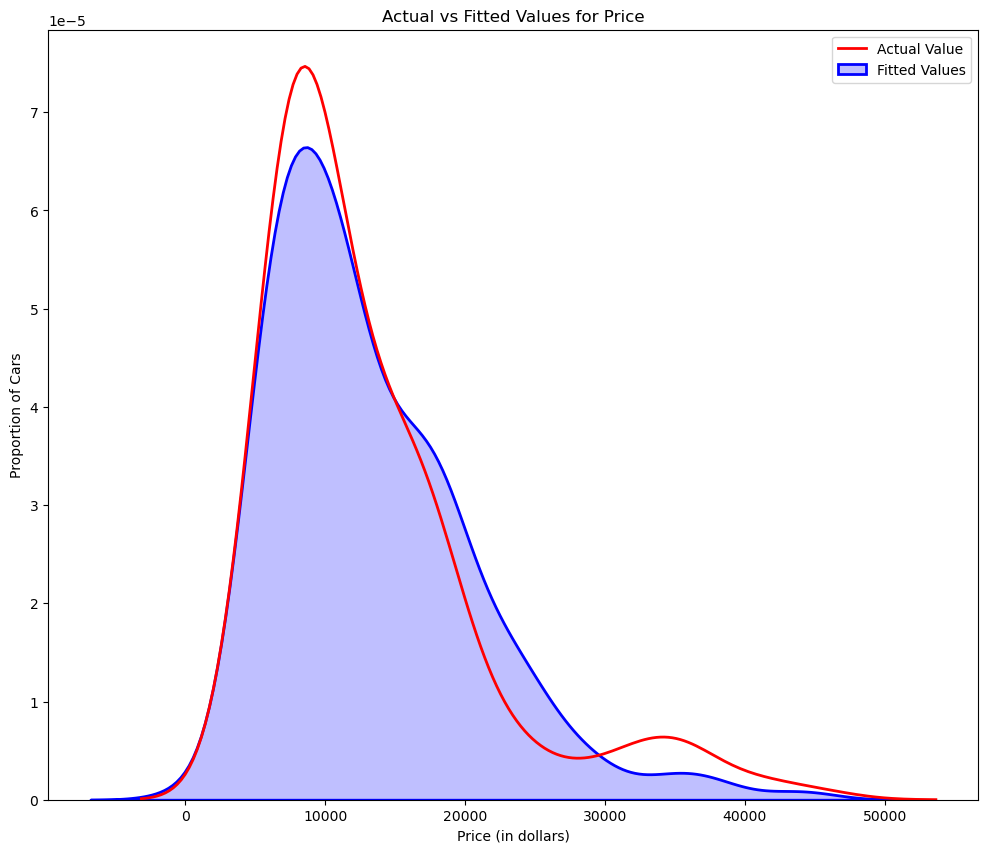

In [32]:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value",  fill=False,      # Fill area under curve
    linewidth=2, alpha=1 ) # store the matplotlib axes object helps to overlay on another graph
sns.kdeplot(Y_hat, color="b", label="Fitted Values",  fill=True,      # Fill area under curve
    linewidth=2,  ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()


In [33]:
x = df['highway-mpg']
y = df['price']

In [34]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [35]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

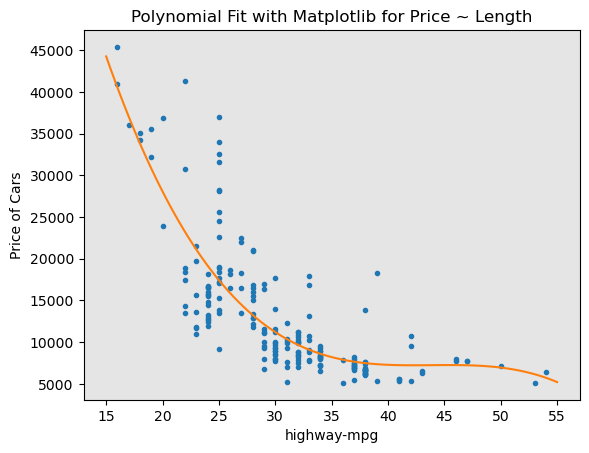

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


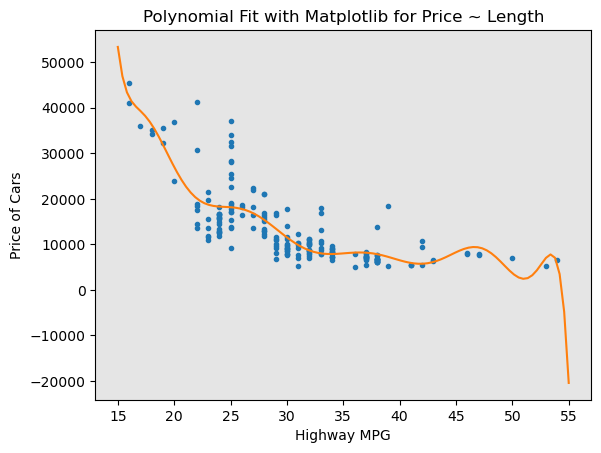

In [38]:
PlotPolly(p1,x,y, 'Highway MPG')

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [41]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [42]:
Z_pr = pr.fit_transform(Z)
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]], shape=(201, 15))

In [43]:
Z.shape

(201, 4)

In [44]:
Z_pr.shape

(201, 15)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [47]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [50]:
Ip = [('scale', StandardScaler()), ('ploynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression)]

In [51]:
pipe1 = Pipeline(Input)

In [52]:
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
ypipe = pipe.predict(Z)
ypipe[:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

In [54]:
lm.fit(Z, df['price'])

LinearRegression()

In [56]:
lm.score(Z, df['price'])

0.8093562806577457

In [72]:
Y_predict_multifit = lm.predict(Z)
Y_predict_multifit[:20]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123])

In [66]:
Yhat[:10] # linear regression

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775, 14729.62322775, 14729.62322775, 14729.62322775,
       13895.32314929, 10057.54278839])

In [61]:
from sklearn.metrics import mean_squared_error

In [71]:
mse = mean_squared_error(df['price'], Yhat)
mse # linear regression
np.sqrt(mse)

np.float64(3875.709744701497)

In [73]:
mse

15021126.025174143

In [ ]:
mean_squared_error(df['price'], Y_predict_multifit) #Multiple linear regression

11980366.87072649

In [67]:
from sklearn.metrics import r2_score

In [70]:
r_squared = r2_score(y, p(x))
r_squared*100

67.41946663906519

In [74]:
mean_squared_error(df['price'], p(x))

20474146.426361207

Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Simple Linear Model (SLR) vs. Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

Multiple Linear Regression (MLR) vs. Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.